## 1. Imports

We start with importing all relevant dependencies and getting the data in an aggegated format. This is done within the `get_data.py` script where create a dataset containing all $100$ files using a Multi-Index on the relevant fields `Year`, `Month`, `Day` and `File Index`. We get a first look at the data with its dimensions and show the first lines to get an overview over the strucutre of the data:

In [3]:
from src.get_data import create_df
from src.get_plots import seasonal_trends, regional_trends
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = create_df()

print('Dataset has {} rows and {} columns'.format(len(data.index), len(data.columns)))
data.head()

2024-12-16 08:36:30,771 - INFO - Dataframe created successfully.


Dataset has 1424400 rows and 23 columns


DOY  2m_temp_max  2m_temp_mean  2m_temp_min  \
year month day region                                                
1981 1     1   9         1         -5.6          -7.8        -11.2   
               19        1         -0.1          -3.5         -7.5   
               22        1         -3.4          -6.5         -9.4   
               24        1         -2.5          -5.3         -8.0   
               30        1          1.1          -1.9         -5.5   

                       2m_dp_temp_max  2m_dp_temp_mean  2m_dp_temp_min  \
year month day region                                                    
1981 1     1   9                 -7.7            -11.4           -16.4   
               19                -2.0             -6.1           -11.4   
               22                -4.9             -8.6           -13.2   
               24                -4.1             -7.3           -11.2   
               30                -0.9             -4.2            -8.5   

                       10m_wind_u  10m_wind_v  fcst_alb  ...  \
year month day region                                    ...   
1981 1     1   9              0.4         0.2      0.51  ...   
               19             1.5         0.9      0.47  ...   
               22             1.0         0.7      0.43  ...   
               24             1.7         0.9      0.44  ...   
               30             2.8         1.2      0.40  ...   

                       surf_net_solar_rad_max  surf_net_solar_rad_mean  \
year month day region                                                    
1981 1     1   9                           81                       13   
               19                         100                       14   
               22                          94                       14   
               24                          91                       15   
               30                         112                       17   

                       surf_net_therm_rad_max  surf_net_therm_rad_mean  \
year month day region                                                    
1981 1     1   9                           33                       11   
               19                          54                       20   
               22                          44                       20   
               24                          47                       22   
               30                          61                       28   

                       surf_press  total_et   prec  volsw_123  volsw_4  \
year month day region                                                    
1981 1     1   9            84236     -0.05  10.94       0.37     0.43   
               19           92665     -0.10   7.85       0.34     0.40   
               22           86233     -0.12  10.02       0.33     0.40   
               24           87064     -0.07  10.91       0.33     0.40   
               30           93880      0.06   9.54       0.35     0.40   

                            date  
year month day region             
1981 1     1   9      1981-01-01  
               19     1981-01-01  
               22     1981-01-01  
               24     1981-01-01  
               30     1981-01-01  

[5 rows x 23 columns]

## 2. Data Exploration

Next, we will look at the data in three stages:

1. Null Values Analysis
2. Statistical Analysis
3. Data Preprocessing

### 2.1 Null Values Analysis

As we can see, we do not have any missing values in the data. However, we can see that there are many entries with a value $=0$ which require further investigation!

In [5]:
missing_vals = int(data.isna().sum(axis=0).sum())
zero_vals = int((data == 0).sum(axis=0).sum())
print('We have {} missing values in the dataset.\nWe have {} zero values in the dataset.'.format(missing_vals, zero_vals))

We have 0 missing values in the dataset.
We have 1084766 zero values in the dataset.


Seeing that we have many zeros values, we want to investigate to what extend the zero values are plausable and if not, whether there are some systematic processes behind values being zero. Therefore, we first look at how zero values are distributed along the columns:

In [6]:
zero_cols = (data == 0).sum(axis=0).sort_values(ascending=False)
pd.DataFrame(zip(zero_cols, zero_cols/len(data.index)*100), 
                                columns=['Abs. Count','Rel. Count (%)'],
                                index= zero_cols.index)

,Abs. Count,Rel. Count (%)
swe,603866,42.394412
prec,275788,19.361696
10m_wind_u,70340,4.938220
10m_wind_v,61991,4.352078
total_et,35376,2.483572
2m_temp_min,6685,0.469320
2m_dp_temp_mean,6341,0.445170
2m_dp_temp_max,6155,0.432112
2m_temp_mean,6092,0.427689
2m_dp_temp_min,5943,0.417228


As we can see, the zero values are spread among a set of variables. For some, zero values are plausible while for others we cannot expect zero values to occur. Therefore we will next go through the variables one by one:

- **swe**: Water equivalent of snow measures the water amount in snow. Since snow is limited to Winter in our climate sphere, the zero values seem plausible!
- **prec**: Since this is the total amount of precipitation, we can assume the zero values to be plausible meaning that it was not raining.
- **10m_wind_(u/v)**: Since is is logical that there are times with no wind present, we also can assume there zero values being plausible!

### 2.2 Statistical Analysis


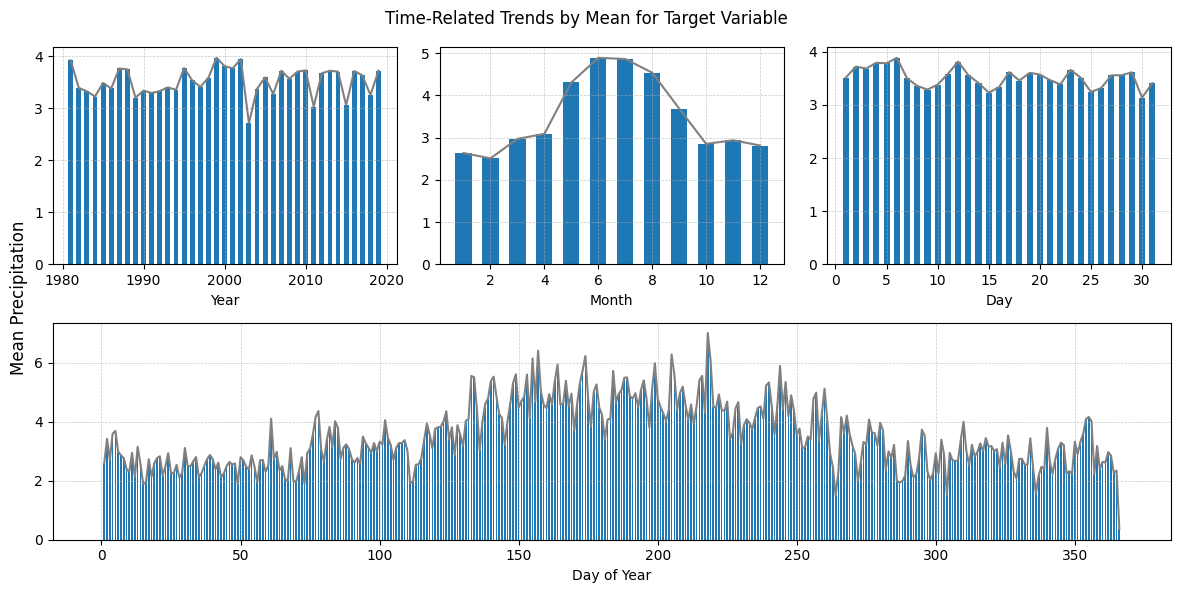

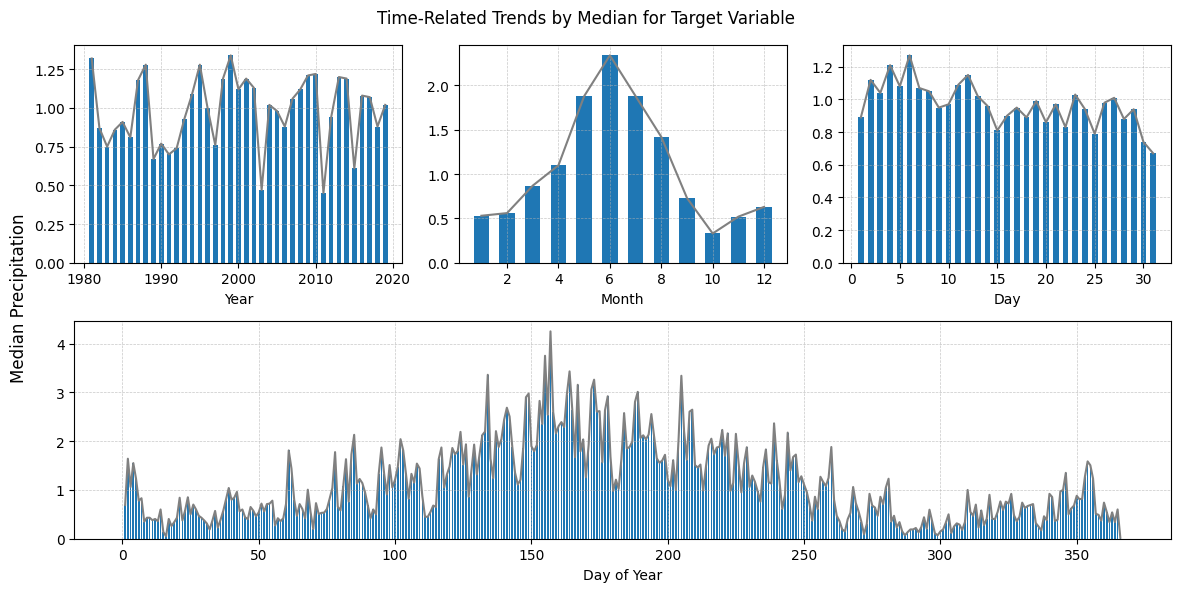

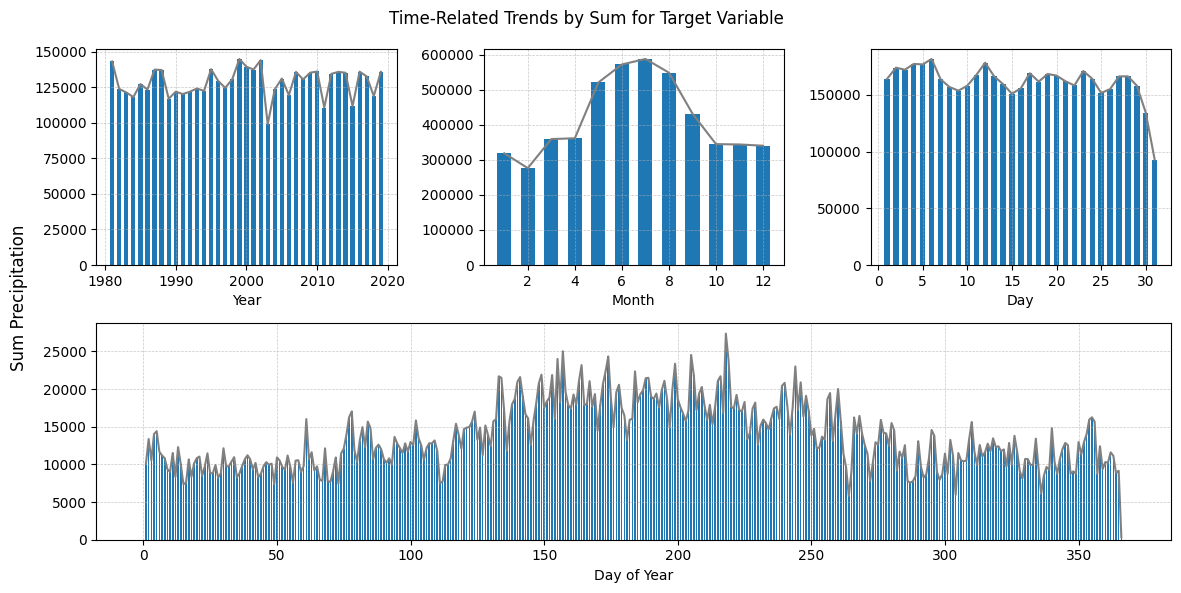

In [7]:
for foo in ['mean', 'median', 'sum']:
    seasonal_trends(data, foo)

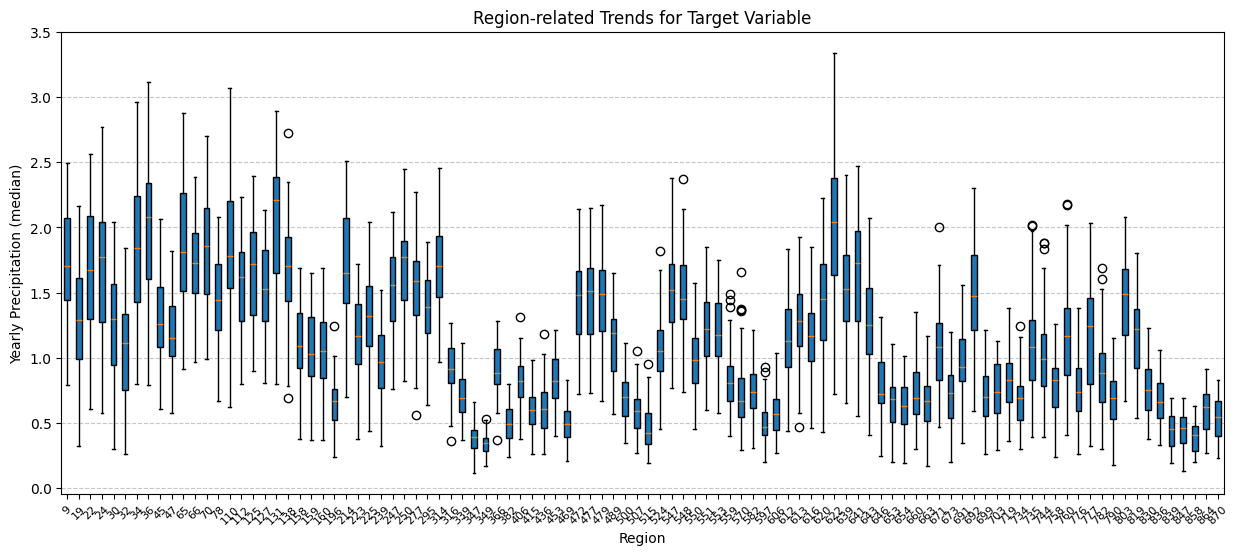

In [ ]:
regional_trends(data, 'mean')